## Logistic Regression for ML by Andrews NG in python

import the libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data=pd.read_csv("ex2data1.txt",header=None)

In [27]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [28]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
#assing the input and output dataset
theta=np.zeros((3,1))

### Creating a scatterplot to show exam1 and exam 2 scores marked with admission yes or no

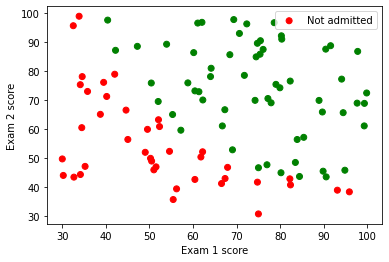

In [29]:
#1

colors = {0:'red',1:'green'}
plt.scatter(X[:,:1], X[:,-1],c=data.iloc[:,-1].apply(lambda y: colors[y]))
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Not admitted"])

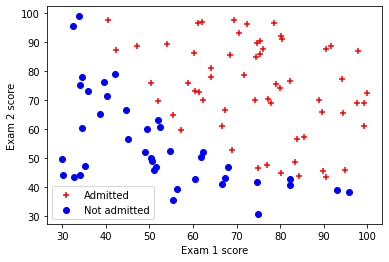

In [30]:
#way2
fig,axes=plt.subplots()
admit,not_admit= (y==1).reshape(len(y),1), (y==0).reshape(len(y),1)
plt.scatter(X[admit[:,0],0],X[admit[:,0],1],c='r',marker='+')
plt.scatter(X[not_admit[:,0],0],X[not_admit[:,0],1],c='b',marker='o')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"])

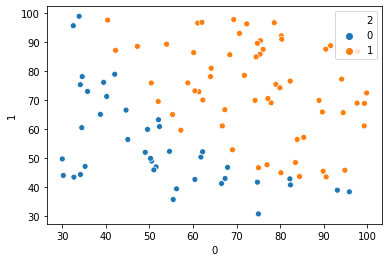

In [31]:
#Way 3

import seaborn as sns
sns.scatterplot(x=0,y=1,data=data,hue=2)

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [68]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [70]:
sigmoid(0)

0.5

## Cost function and Gradient decent computation

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

In [34]:
def computeCost(x,y,theta):
    m=len(y)
    
    predictions=sigmoid(np.dot(x,theta))
    
    error= -y *np.log(predictions) -(1-y)*(np.log(1-predictions))
    
    cost=(1/m)*np.sum(error)
    
    gradient=1/m * np.dot(x.transpose(),(predictions-y))
    
    return cost, gradient

In [35]:
## Declaring X,y,theta's intial value
m,n=X.shape[0], X.shape[1]
X=np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
theta_0=np.zeros((n+1,1))

In [36]:
## computing cost and gradient decent

cost,gradient=computeCost(X,y,theta_0)
print("cost= ",cost)
print("Gradient= ",gradient)

cost=  0.6931471805599453
Gradient=  [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [37]:
#Standarize the x varibale

def normalize(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x_normal=(x - mean)/std
    return x_normal

In [38]:
#Again declare variable

X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
#assing the input and output dataset
#theta=np.zeros((3,1))

In [39]:
## Declaring X,y,theta's intial value
m,n=X.shape[0], X.shape[1]
X=normalize(X)
X=np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
theta=np.zeros((n+1,1))

In [40]:
## computing cost and gradient decent

cost,gradient=computeCost(X,y,theta_0)
print("cost= ",cost)
print("Gradient= ",gradient)

cost=  0.6931471805599453
Gradient=  [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


## Gradient Decent

Minimize the cost function $J(\Theta)$ 

By updating Equation and repeat unitil convergence
        
$\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\Theta_j$ for all $j$)

In [41]:
def gradientDecent(x,y,theta ,alpha,iter_num):
    cost_hist=[]
    m=len(y)
    
    for n in range(iter_num):
        cost,gradient=computeCost(x,y,theta)
        theta-=alpha * gradient
        cost_hist.append(cost)
    return cost_hist,theta
        

In [42]:
cost_history,theta=gradientDecent(X,y,theta,1,500)

In [43]:
print("optimized value of gradient decent",theta)
print("optimized value of ",cost_history[-1])

optimized value of gradient decent [[1.6860838 ]
 [3.92373195]
 [3.65831667]]
optimized value of  0.20352828547330373


## plotting the cost function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

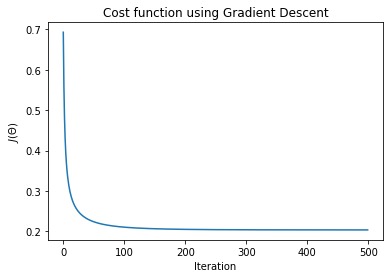

In [44]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

## Plotting the decision boundary

From Machine Learning Resources:
    
$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$

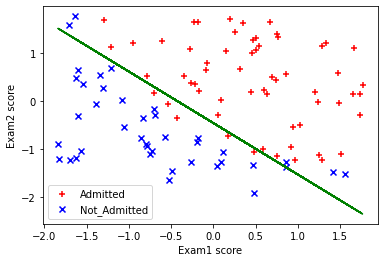

In [51]:
pos,neg= (y==1).reshape(len(y),1),(y==0).reshape(len(y),1)
#beacuse now x is 3*1 matrix because we have addded a np.ones column for theta_0
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c='r',marker='+',label='Admitted')
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c='b',marker='x',label='Not_Admitted')
#we will plot its as x2 against x3 where x3=-(Θ1+Θ2𝑥2)/Θ3
plt.plot(X[:,1],-(theta[0]+theta[1]*X[:,1])/theta[2],"g")
plt.xlabel("Exam1 score")
plt.ylabel("Exam2 score")
plt.legend(loc=0)

## Evaluating logistic regression

In [80]:
def predictYClassifier(X,theta):
    predict_y=X.dot(theta)
    return predict_y>0

In [88]:
p=predictYClassifier(X,theta)
print("Training accuracy=", sum(p==y)[0]/len(y))

Training accuracy= 0.89
